<a href="https://colab.research.google.com/github/rajubhojane/Water-Prediction/blob/main/Water_shortage_risk_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv("water_shortage_balanced.csv")
df.head()

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Groundwater Level (meters below surface),Reservoir Capacity (%),Total Water Consumption (billion liters),Water Shortage Risk
0,Tamil Nadu,2013,179.34,997.0,51865.1,143.82,240.53,35.0,16.7,384.35,Yes
1,Bihar,2020,29.93,2576.9,74682.9,349.20,60.57,3.5,74.7,409.77,No
2,Andhra Pradesh,2004,160.14,732.7,131604.3,367.33,96.27,31.7,70.7,463.60,No
3,Chhattisgarh,2002,94.05,868.2,146354.3,378.86,244.61,38.2,5.1,623.47,Yes
4,Madhya Pradesh,2009,60.95,957.0,79678.0,259.11,139.69,43.1,7.6,398.80,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     5000 non-null   object 
 1   Year                                      5000 non-null   int64  
 2   Population (millions)                     5000 non-null   float64
 3   Annual Rainfall (mm)                      5000 non-null   float64
 4   Agricultural Land (sq km)                 5000 non-null   float64
 5   Industrial Water Usage (billion liters)   5000 non-null   float64
 6   Domestic Water Usage (billion liters)     5000 non-null   float64
 7   Groundwater Level (meters below surface)  5000 non-null   float64
 8   Reservoir Capacity (%)                    5000 non-null   float64
 9   Total Water Consumption (billion liters)  5000 non-null   float64
 10  Water Shortage Risk                 

In [ ]:
df.describe()

,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Groundwater Level (meters below surface),Reservoir Capacity (%),Total Water Consumption (billion liters)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2012.295000,124.019458,1680.060720,96838.502420,275.012536,156.483960,31.404280,39.510380,431.496496
std,7.853452,73.625661,1074.138495,54274.062927,141.485014,83.739021,13.057648,28.199296,155.727042
min,2000.000000,2.060000,500.800000,1000.700000,1.110000,0.720000,1.000000,5.000000,16.590000
25%,2005.000000,55.140000,805.100000,52936.700000,153.367500,92.980000,22.000000,16.700000,334.125000
50%,2012.000000,121.960000,1130.750000,92203.300000,276.720000,155.675000,35.000000,28.200000,417.490000
75%,2019.000000,191.557500,2589.175000,139033.325000,399.725000,232.632500,41.900000,62.825000,530.630000
max,2025.000000,249.980000,3996.100000,199934.500000,499.700000,299.960000,49.900000,99.900000,796.240000


In [ ]:
df.isnull().sum()

,0
State,0
Year,0
Population (millions),0
Annual Rainfall (mm),0
Agricultural Land (sq km),0
Industrial Water Usage (billion liters),0
Domestic Water Usage (billion liters),0
Groundwater Level (meters below surface),0
Reservoir Capacity (%),0
Total Water Consumption (billion liters),0


In [ ]:
# Drop Year column as it is not needed
df.drop(columns=["Year"],inplace=True)


In [ ]:
df.head()

,State,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Groundwater Level (meters below surface),Reservoir Capacity (%),Total Water Consumption (billion liters),Water Shortage Risk
0,Tamil Nadu,179.34,997.0,51865.1,143.82,240.53,35.0,16.7,384.35,Yes
1,Bihar,29.93,2576.9,74682.9,349.20,60.57,3.5,74.7,409.77,No
2,Andhra Pradesh,160.14,732.7,131604.3,367.33,96.27,31.7,70.7,463.60,No
3,Chhattisgarh,94.05,868.2,146354.3,378.86,244.61,38.2,5.1,623.47,Yes
4,Madhya Pradesh,60.95,957.0,79678.0,259.11,139.69,43.1,7.6,398.80,Yes


In [ ]:
# Step 3: Split features and target variable
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Water Shortage Risk"])  # Features
y = df["Water Shortage Risk"]  # Target variable

In [ ]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Normalize the data to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)



In [ ]:
# Step 6: Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)




LogisticRegression()

In [ ]:
# Step 7: Make predictions
ypred = model.predict(xtest)

ypred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Accuracy: 0.3333333333333333
Confusion Matrix:
 [[0 2]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



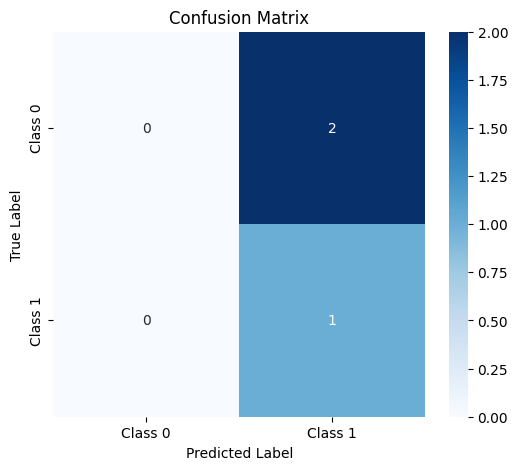

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


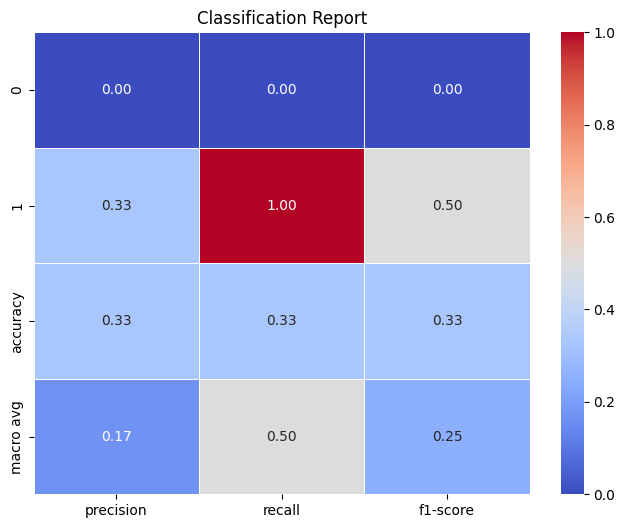

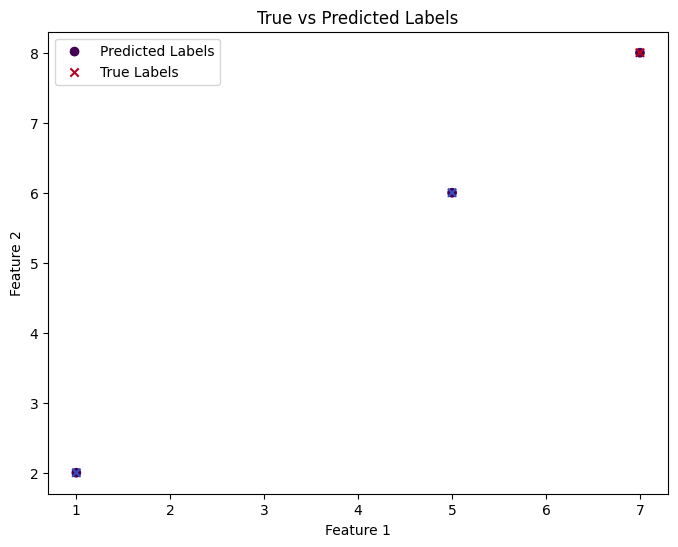

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace with your actual dataset)
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])  # Your feature matrix
y = np.array([0, 1, 0, 1])  # Your target variable

# Split data into training and testing sets (80% training, 20% testing)
xtest, xtrain, ytest, ytrain = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(xtrain, ytrain)

# Make predictions using the trained model
ypred = model.predict(xtest)

# Now, calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(ytest, ypred)
conf_matrix = confusion_matrix(ytest, ypred)  # Define conf_matrix here
class_report = classification_report(ytest, ypred)

# Print results
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizations

# 1. Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Visualize the Classification Report (precision, recall, f1-score)
report_df = pd.DataFrame.from_dict(classification_report(ytest, ypred, output_dict=True)).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Classification Report")
plt.show()

# 3. Plot True vs Predicted Labels (Only works if data is 2D)
if xtest.shape[1] == 2:  # Check if data has 2 features
    plt.figure(figsize=(8, 6))
    plt.scatter(xtest[:, 0], xtest[:, 1], c=ypred, cmap='viridis', label="Predicted Labels")
    plt.scatter(xtest[:, 0], xtest[:, 1], c=ytest, cmap='coolwarm', marker='x', label="True Labels")
    plt.title("True vs Predicted Labels")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()
else:
    print("Data is not 2D. Cannot plot True vs Predicted Labels directly.")
